In [1]:
from unidec_modules import mzmlparse_auto as automzml
import unidec
from unidec_modules import ChromEng as chrom
from UniChrom2 import *
from pathlib import Path
import os
import matplotlib.pyplot as plt

In [2]:
mzml = "mzML.mzML"
# folder_name = mzml[:-5] + "_upload"
curr_dir =  os.getcwd()
path = curr_dir + "/" + mzml[:-5] + "/" + mzml # (going to make a new folder containing the processed data eventually)

In [3]:
# initiate UniChrom
app = ChromApp()


UniDec Engine v.4.4.0

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.4.4.0

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe


In [4]:
eng = app.eng
eng.open_chrom(path)

Opening:  mzML.mzML
Opening HDF5 File: C:\Users\cm19ljc\Documents\GitHub\UniDec/mzML/mzML.hdf5
Reading mzML: C:\Users\cm19ljc\Documents\GitHub\UniDec/mzML/mzML.mzML
[Warning] Not index found and build_index_from_scratch is False
Converted to gzip file to improve speed: C:\Users\cm19ljc\Documents\GitHub\UniDec/mzML/mzML.mzML.gz
Error getting TIC in mzML; trying to make it...
Imported Data. Constructing TIC
Done


C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_modules\mzMLimporter.py:217: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.data = np.array(self.data)


True

In [5]:
# -- Data processing 
eng.config.subtype = 2 # background subtraction - subtract curved
eng.config.subbuff = 100 # background subtraction amount(subtract curved) 0 = 0ff, 100 = good amount when on
eng.config.datanorm = 0 # turn off data normalisation

# -- Deconvolution
eng.config.numit = 100 # number of iterations

# mass range (default = 5000.0 to 500000.0 Da)
eng.config.massub = 15000 # upper 
eng.config.masslb = 11000 # lower

eng.config.massbins = 0.1 # sample mass every 0.1 Da

# FWHM 
# eng.get_auto_peak_width()
eng.config.mzsig = 0 

# charge range
eng.config.startz = 1
eng.config.endz = 20

# smoothing 
eng.config.zzsig = 1 # charge smooth width (smooth charge state distributions)
eng.config.psig = 1 # smooth nearby points (point smooth width, some = 1)
eng.config.beta = 0 # suppress artifacts (beta, some = 50)

eng.config.psfun = 0 # Peak shape function (gaussian, lorentzian, split G/L)

# -- Peak Selection and plotting
eng.config.peaknorm = 0 # Normalise peaks (0 = off)
eng.config.peakwindow = 100 # integration window / Da
eng.config.nativeub = 10
eng.config.nativelb = -10


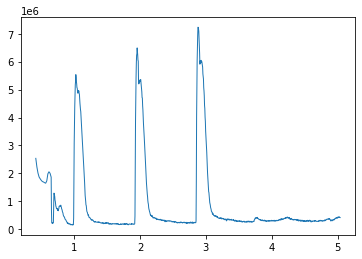

In [6]:
plt.plot(eng.tic[:, 0], eng.tic[:, 1])
plt.show()

In [7]:
# create new attributes defining location of peaks in the tic - peak detection algorithm option? 
eng.firstpeak = 62
eng.peakspacing = 56
eng.totalpeaks = 3
eng.peakwindowll = 5
eng.peakwindowul = 5

In [8]:
eng.peaktimes = [eng.firstpeak + i*eng.peakspacing for i in range(eng.totalpeaks)]
eng.peaktimes

[62, 118, 174]

In [9]:
# use this attribute to update peak windows
eng.chrompeaks_tranges = [[(i-eng.peakwindowll)/60, (i+eng.peakwindowul)/60]for i in eng.peaktimes] # get peak windows
eng.chrompeaks_tranges

[[0.95, 1.1166666666666667],
 [1.8833333333333333, 2.05],
 [2.816666666666667, 2.9833333333333334]]

Getting scans: [86, 125]
Length merge axis: 28915
0.95
0.95


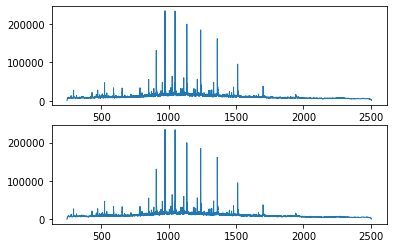

~~~~~~~~~~~~~
Getting scans: [311, 350]
Length merge axis: 30293
1.8833333333333333
1.8833333333333333


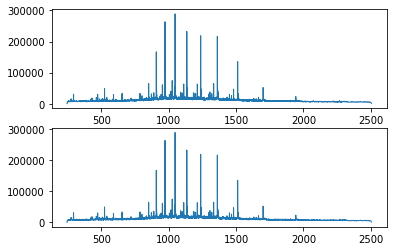

~~~~~~~~~~~~~
Getting scans: [535, 574]
Length merge axis: 31342
2.816666666666667
2.816666666666667


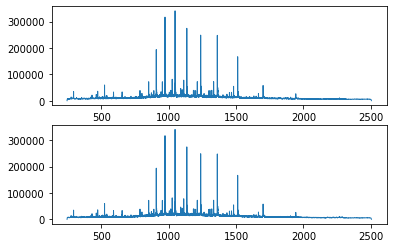

~~~~~~~~~~~~~


In [30]:
# add spectra within peak windows into unidec

times = eng.chrompeaks_tranges

for i, t in enumerate(times): # copied from add_chrom_peaks() in ChromEng.py
    data = eng.get_data_from_times(t[0], t[1])
    
    print(t[0])
    print(eng.scans[2])
    plt.figure()
    plt.subplot(211)
    plt.plot(data[:, 0], data[:, 1])
    plt.subplot(212)
    plt.plot(eng.mzdata[:, 0], eng.mzdata[:, 1])
    plt.show()
    print("~~~~~~~~~~~~~")
    

In [29]:
# add spectra within peak windows into unidec

times = eng.chrompeaks_tranges

for i, t in enumerate(times): # copied from add_chrom_peaks() in ChromEng.py
    data = eng.get_data_from_times(t[0], t[1])
    eng.data.add_data(data = eng.mzdata, name=str(eng.scans[2]), attrs=eng.attrs, export=True)
    eng.reset_vars(True)
    print(eng.scans[2])

Getting scans: [86, 125]
Length merge axis: 28915
0.95
Getting scans: [311, 350]
Length merge axis: 30293
1.8833333333333333
Getting scans: [535, 574]
Length merge axis: 31342
2.816666666666667


In [25]:
eng.mzdata

array([[ 244.74844798,  196.        ],
       [ 244.76661065,  195.85581723],
       [ 244.78477467,  195.71162377],
       ...,
       [2504.38137114, 1136.51774876],
       [2504.5672201 ,  822.98228007],
       [2504.75308285,  293.83499457]])

In [26]:
app.on_unidec_run()

Creating file: C:\Users\cm19ljc\Documents\GitHub\UniDec/mzML\UniDec_Figures_and_Files\mzML_selection.txt
Opening File:  C:\Users\cm19ljc\Documents\GitHub\UniDec/mzML\UniDec_Figures_and_Files\mzML_selection.txt
Loading Time: 0.44s
Linear False
Data Prep Time: 0.077s
UniDec run 1.1s
File Name:  C:\Users\cm19ljc\Documents\GitHub\UniDec/mzML\UniDec_Figures_and_Files\mzML_selection.txt R Squared:  0.8350942741647711
Plot 4: 0.07s
Plot 2: 0.059s
